In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")
data


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


Epoch 1/10
5/5 [==============================] - 5s 6ms/step - loss: 0.1060
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0946
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0842
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0737
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0638
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0546
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0369
Epoch 10/10
2/2 [==============================] - 1s 10ms/step
Mean Squared Error: 10112.424398936302
Mean Absolute Error: 84.55235242688978
R-squared Score: 0.3841014421871911
1/1 [==============================] - 0s 22ms/step
Predicted Close Price for New Data: 88.47120666503906


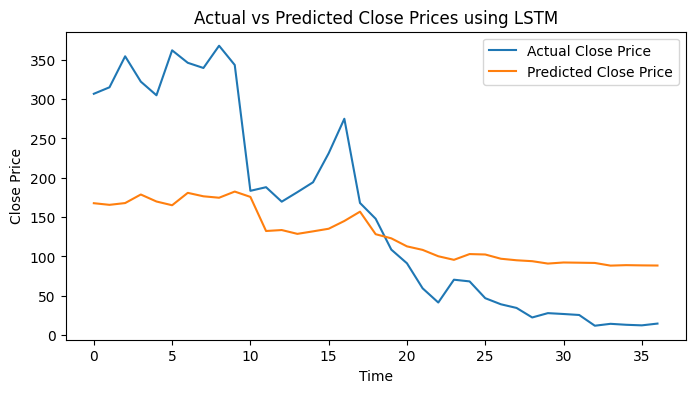

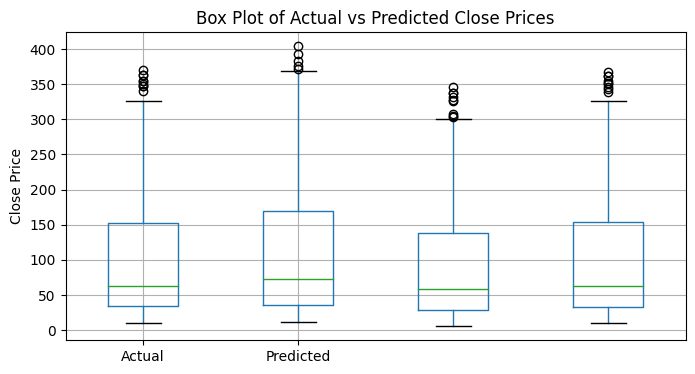

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the "Close" prices
close_prices = data["Close"].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Define the number of time steps for LSTM
n_steps = 1  # You can adjust this

# Prepare the data for LSTM
X, y = [], []
for i in range(n_steps, len(scaled_close)):
    X.append(scaled_close[i - n_steps:i, 0])
    y.append(scaled_close[i, 0])
X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape input data for LSTM (batch_size, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the "Close" prices using the model
predicted_scaled_close = model.predict(X_test)
predicted_close = scaler.inverse_transform(predicted_scaled_close)

# Calculate performance metrics
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_close)
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_close)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predicted_close)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Predict the Close price for a new data point
new_data = np.array([[12.41]])  # Input should be normalized
new_data_scaled = scaler.transform(new_data)
new_data_reshaped = new_data_scaled.reshape(1, n_steps, 1)
predicted_new_scaled_close = model.predict(new_data_reshaped)
predicted_new_close = scaler.inverse_transform(predicted_new_scaled_close)
print(f"Predicted Close Price for New Data: {predicted_new_close[0][0]}")

# Plot the actual vs predicted "Close" prices
plt.figure(figsize=(8, 4))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual Close Price")
plt.plot(predicted_close, label="Predicted Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Prices using LSTM")
plt.legend()
plt.show()

# Create a box plot
plt.figure(figsize=(8, 4))
data.boxplot()
plt.title("Box Plot of Actual vs Predicted Close Prices")
plt.ylabel("Close Price")
plt.xticks([1, 2], ["Actual", "Predicted"])
plt.show()